
## Name: Nguyễn Xuân Minh Khôi

## Email: neo.nxmk@gmail.com

## Subject: Machine Learning

## Dataset name: Churn Modelling

## This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Kaggle link: https://www.kaggle.com/shrutimechlearn/churn-modelling

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)
%cd'/content/gdrive/My Drive/FPT MSE/ML project'

Mounted at /content/gdrive
/content/gdrive/My Drive/FPT MSE/ML project


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


# Read data and preprocessing

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.groupby(by='Geography').count()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [8]:
x = df.iloc[:,3:13].values
y = df.iloc[:,13].values

In [9]:
# Exited customer
exited = np.count_nonzero(y)
exited

2037

In [10]:
# Customer left
no_exited = y.shape[0] - exited
no_exited

7963

In [11]:
from scipy.stats import itemfreq


# Exited customer / Customer left
# 1: left
# 0: stay
itemfreq(y)

array([[   0, 7963],
       [   1, 2037]])

In [12]:
# First 10 customer
x[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

# Encoding categorical data and the independent variable

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


labelencoder_x1 = LabelEncoder()
x[:,1] = labelencoder_x1.fit_transform(x[:,1])

labelencoder_x2 = LabelEncoder()
x[:,2] = labelencoder_x2.fit_transform(x[:,2])
                                       
ct = ColumnTransformer([('encoder', OneHotEncoder(),[1])], remainder='passthrough')
x = ct.fit_transform(x.tolist())

In [14]:
# First 10 encoded customer data
x[:10]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

Since there are only 3 countries, when generating the country OneHotEncoder matrix will look like this.

    France 1, 0, 0

    Germany 0, 1, 0

    Spain 0, 0, 1

Accordingly, it is possible to remove the first 1 column, the following 2 columns are enough to represent the codes of 3 countries.

    France 0, 0

    Germany 1, 0

    Spain 0, 1

In [15]:
x = x[:, 1:]

In [16]:
x[:10]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [17]:
x[0]

array([0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

# Splitting the dataset into the traning set and test set and then feature scaling them

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Splitting the dataset
# The dataset is splitted into three proportions: 80, 10, 10
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=1 - train_ratio, random_state=0)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(x_train.shape, x_val.shape, x_test.shape)

(8000, 11) (1000, 11) (1000, 11)


In [19]:
# Feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

# Saving the scaled feature
scalerfile = 'sc.sav'
pickle.dump(sc, open(scalerfile, 'wb'))

In [20]:
x_train[:5]

array([[-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
         0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
         1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945,  0.91601335,  0.30102557,
        -1.37744033, -0.00631193, -0.92159124,  0.64259497,  0.9687384 ,
        -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, -1.09168714, -0.94312892,
        -1.031415  ,  0.57993469, -0.92159124,  0.64259497, -1.03227043,
         1.48533467],
       [-0.5698444 ,  1.74309049,  0.03556578,  0.91601335,  0.10961719,
         0.00666099,  0.47312769, -0.92159124,  0.64259497, -1.03227043,
         1.27652776],
       [-0.5698444 ,  1.74309049,  2.05611444, -1.09168714,  1.73658844,
         1.04473698,  0.8101927 ,  0.8095029 ,  0.64259497,  0.9687384 ,
         0.55837842]])

In [21]:
x_train[0].shape

(11,)

# Building an Artificial Neural Network model

1.   Initialize the ANN using the keras Sequential class and name it classifier.

2.   Create a Dense input layer with an output_dim of 6 (11 inputs + 1 outputs)/2 or 12(11 + 1). There is no strict rule for this value.

3.   Activation function: 'relu' (usually applied to input layers and hidden network layers).

     Optimizer: 'adam'

     Loss function: 'binary_crossentropy'

4.   input_shape = (11,) (there are independent input variables in x matrix).

--> Add hidden layer using classifier.add().

In [22]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
# Initialing the ANN
classifier = Sequential()

In [24]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=12, activation='relu', input_shape=(11,)))

# Adding the second hidden layer
classifier.add(Dense(units=8, activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units=8, activation='relu'))

# Adding the fourth hidden layer
classifier.add(Dense(units=8, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compiling ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Set early stopping monitor so the model stops traning when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
# Ensure that the results are the same regarding notebook restartation
np.random.seed(12)
# Fitting classifier to the training set
history = classifier.fit(x_train, y_train , validation_data=(x_val, y_val), epochs=200, batch_size=32, callbacks=[early_stopping_monitor])

Epoch 1/200
250/250 [==============================] - 4s 4ms/step - loss: 0.5437 - accuracy: 0.7977 - val_loss: 0.4558 - val_accuracy: 0.7910
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.7994 - val_loss: 0.4240 - val_accuracy: 0.7910
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8024 - val_loss: 0.4084 - val_accuracy: 0.8110
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 0.8207 - val_loss: 0.3895 - val_accuracy: 0.8310
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8286 - val_loss: 0.3783 - val_accuracy: 0.8300
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3676 - accuracy: 0.8483 - val_loss: 0.3690 - val_accuracy: 0.8460
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8449 - val_loss: 0.3626 - val_accuracy: 0.8460

# Making a predictions and evaluating the models

In [27]:
# Predicting the test set results
y_pred = classifier.predict(x_test)

In [28]:
y_pred[:5]

array([[0.16062665],
       [0.16146128],
       [0.18074115],
       [0.01612343],
       [0.15854755]], dtype=float32)

In [29]:
y_pred = y_pred > 0.5
y_pred[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


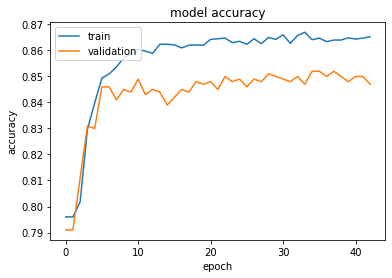

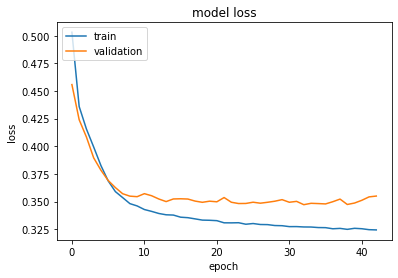

In [30]:
import matplotlib.pyplot as plt


# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
cm

array([[750,  54],
       [ 81, 115]])

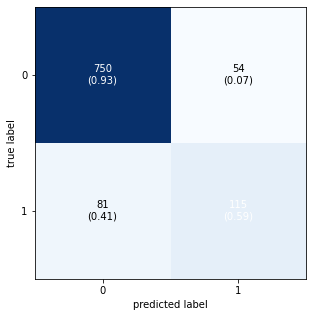

In [45]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib


class_names=['Staying','Leaving']
matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat= matrix,figsize=(5,5),show_normed=True)
plt.xticks(rotation=0);

In [32]:
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])
print(accuracy)

0.865


In [33]:
# Evaluation
print('Accuracy:', classifier.evaluate(x_test, y_test))

32/32 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8650
Accuracy: [0.3366428315639496, 0.8650000095367432]


In [34]:
# Save the model
from tensorflow.keras.models import load_model


classifier.save('ANN_model_Churn Modelling.h5')

# Test model with fake data

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: 50000

So should we say goodbye to that customer ? False: no, True: yes

In [47]:
new_pred = classifier.predict(sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_pred = new_pred > 0.5

if new_pred == False:
    print('This customer will stay with us')
else:
    print('This customer will leave us')

This customer will stay with us
